In [215]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from pydataset import data

from ipywidgets import AppLayout, Button

import warnings
warnings.filterwarnings('ignore')

from env import host, user, password

In [216]:
AppLayout(header=Button(description='Top'),
         footer=Button(description='Bottom'))

AppLayout(children=(Button(description='Top', layout=Layout(grid_area='header'), style=ButtonStyle()), Button(…

In [217]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [218]:
def get_url(database, username=user, hostname=host, password=password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [219]:
url = get_url(database='employees')

print('hide get_url function results')

hide get_url function results


In [220]:
sql = 'SELECT * FROM employees LIMIT 200'

In [6]:
pd.read_sql(sql, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
195,10196,1954-01-27,Marc,Hellwagner,M,1994-11-16
196,10197,1963-08-06,Kasidit,Krzyzanowski,F,1993-11-22
197,10198,1953-05-28,Pranav,Furedi,M,1985-08-31
198,10199,1959-04-07,Kazuhisa,Ranta,M,1997-04-29


## Excercises

### Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [294]:
data().sample(15)

,dataset_id,title
583,Employment,Employment Status
166,heart,Heart Catherization Data
124,bcdeter,data from Section 1.18
397,Guerry,"Data from A.-M. Guerry, ""Essay on the Moral Statistics of France"""
493,npk,"Classical N, P, K Factorial Experiment"
744,siemens,Daily Log Returns on Siemens Share Price
4,HairEyeColor,Hair and Eye Color of Statistics Students
749,InstEval,University Lecture/Instructor Evaluations by Students at ETH
372,l51,An example pedigree data
203,Ginzberg,Data on Depression


In [221]:
mpg = data('mpg')

In [222]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [223]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

#### Rename columns

In [224]:
mpg.columns = ['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drive', 'city',
       'highway', 'fl', 'class']

In [225]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drive',
       'city', 'highway', 'fl', 'class'],
      dtype='object')

## Groupby Practice

- Interesting that city mileage seems to have gone down over time!

- Highway pretty much stayed the same over time.

In [226]:
mpg.groupby('year').city.mean()

year
1999    17.017094
2008    16.700855
Name: city, dtype: float64

In [227]:
mpg.groupby('year').highway.mean()

year
1999    23.427350
2008    23.452991
Name: highway, dtype: float64

In [296]:
mpg.groupby('manufacturer')['highway', 'city'].agg(['mean', 'median'])

highway              city       
                   mean median       mean median
manufacturer                                    
audi          26.444444   26.0  17.611111   17.5
chevrolet     21.894737   23.0  15.000000   15.0
dodge         17.945946   17.0  13.135135   13.0
ford          19.360000   18.0  14.000000   14.0
honda         32.555556   32.0  24.444444   24.0
hyundai       26.857143   26.5  18.642857   18.5
jeep          17.625000   18.5  13.500000   14.0
land rover    16.500000   16.5  11.500000   11.5
lincoln       17.000000   17.0  11.333333   11.0
mercury       18.000000   18.0  13.250000   13.0
nissan        24.615385   26.0  18.076923   19.0
pontiac       26.400000   26.0  17.000000   17.0
subaru        25.571429   26.0  19.285714   19.0
toyota        24.911765   26.0  18.529412   18.0
volkswagen    29.222222   29.0  20.925926   21.0

### On average, which manufacturer has the best miles per gallon?

In [228]:
mpg.sort_values(by=['city', 'highway'], ascending=False)

,manufacturer,model,displ,year,cyl,trans,drive,city,highway,fl,class
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
...,...,...,...,...,...,...,...,...,...,...,...
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup


#### Calculate average mileage and create a new column

In [229]:
mpg['average_mileage'] = (mpg.city + mpg.highway) / 2

#### Return only the top manufacturer for best average mileage

In [230]:
mpg.sort_values(by='average_mileage', ascending=False).manufacturer.values[0]

'volkswagen'

### How many different manufacturers are there?


In [231]:
mpg[['manufacturer']].nunique()

manufacturer    15
dtype: int64

In [232]:
len(mpg['manufacturer'].unique())

15

In [233]:
len(mpg.manufacturer.value_counts().index)

15

### How many different models are there?


In [234]:
mpg[['model']].nunique()

model    38
dtype: int64

In [235]:
len(mpg['model'].unique())

38

In [236]:
len(mpg.model.value_counts().index)

38

### Do automatic or manual cars have better miles per gallon?


In [237]:
# subset of manual transmission cars only

manual = mpg[mpg.trans.str.contains('manu')]

In [238]:
# mean of average mileage of manual transmission cars

avg_mileage_manual = manual.average_mileage.sort_values(ascending=False).mean()
avg_mileage_manual

22.227272727272727

In [239]:
automatic = mpg[mpg.trans.str.contains('auto')]

In [240]:
avg_mileage_auto = automatic.average_mileage.sort_values(ascending=False).mean()

In [241]:
print(f'The average mileage of manual cars is {round(avg_mileage_manual)} and the average mileage of automatic cars is {round(avg_mileage_auto)}.')

The average mileage of manual cars is 22 and the average mileage of automatic cars is 19.


#### Another way to do it...

In [242]:
(manual.city + manual.highway).sum() / (len(manual) * 2)

22.227272727272727

In [243]:
manual.average_mileage.sum() / len(manual)

22.227272727272727

In [244]:
print(f'The average mileage of automatics is better than manuals: {avg_mileage_auto > avg_mileage_manual}.')

The average mileage of automatics is better than manuals: False.


### Joining and Merging

- Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?



In [245]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

In [246]:
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [247]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

In [248]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [249]:
pd.merge(users, roles, how='outer', left_on='role_id', right_on='id').rename(columns={'name_x': 'name', 'name_y': 'role'})

,id_x,name,role_id,id_y,role
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


### Getting data from SQL databases

- Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.


In [250]:
def get_url(database, username=user, hostname=host, password=password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

- Use your function to obtain a connection to the employees database.


In [251]:
url = get_url('employees')
sql = 'SELECT * FROM employees'

In [252]:
employees = pd.read_sql(sql, url)

In [253]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [254]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
emp_no        300024 non-null int64
birth_date    300024 non-null object
first_name    300024 non-null object
last_name     300024 non-null object
gender        300024 non-null object
hire_date     300024 non-null object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


### Subset and visualize current employees

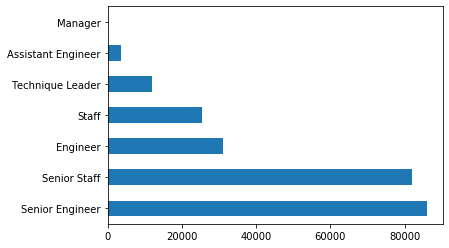

In [319]:
titles[titles.to_date == titles.to_date.max()].title.value_counts().plot.barh()

plt.show()

In [329]:
corrected_max_date = titles[titles.to_date != titles.to_date.max()].to_date.max()

In [331]:
titles['to_date_fixed'] = np.where(titles.to_date == titles.to_date.max(), corrected_max_date, titles.to_date)

In [332]:
titles

,emp_no,title,from_date,to_date,to_date_fixed
0,10001,Senior Engineer,1986-06-26,9999-01-01,2002-08-01
1,10002,Staff,1996-08-03,9999-01-01,2002-08-01
2,10003,Senior Engineer,1995-12-03,9999-01-01,2002-08-01
3,10004,Engineer,1986-12-01,1995-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,2002-08-01
...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01,2002-08-01
443305,499998,Senior Staff,1998-12-27,9999-01-01,2002-08-01
443306,499998,Staff,1993-12-27,1998-12-27,1998-12-27


In [183]:
#today = pd.datetime.now().date()

In [172]:
#print(today)

2020-03-05


In [255]:
#employees.to_date.str.replace('9999-01-01', '2020-03-05')

In [175]:
#employees['today'] = today

In [256]:
#employees.head(5)

- Read the employees and titles tables into two separate dataframes



In [261]:
url = get_url('employees')
sql = 'SELECT * FROM titles'

In [262]:
titles = pd.read_sql(sql, url)

In [263]:
titles.head(1)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01


In [264]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
emp_no       443308 non-null int64
title        443308 non-null object
from_date    443308 non-null object
to_date      443308 non-null object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


- Join the employees and titles dataframes together.


In [130]:
emp_titles = pd.merge(employees, titles, on='emp_no', how='outer')
emp_titles.head(1)

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01


- Visualize the number of employees with each title.


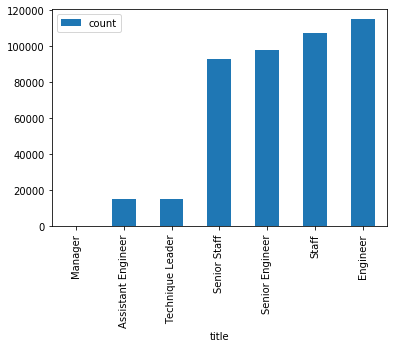

In [324]:
emp_titles.groupby('title')[['emp_no']].count().sort_values(by='emp_no').rename(columns={'emp_no': 'count'}).plot.bar()

plt.show()

### Visualize how frequently employees change titles.


#### Number of employees who have held 1, 2, or 3 titles in their time at the company.

In [325]:
emp_titles.groupby('emp_no').title.count().value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

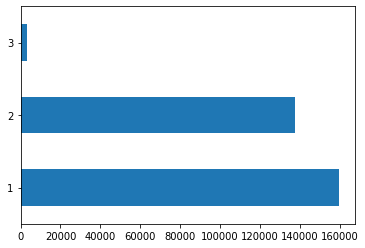

In [321]:
emp_titles.groupby('emp_no').title.count().value_counts().plot.barh()

plt.show()

In [192]:
emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
emp_no        443308 non-null int64
birth_date    443308 non-null object
first_name    443308 non-null object
last_name     443308 non-null object
gender        443308 non-null object
hire_date     443308 non-null object
title         443308 non-null object
from_date     443308 non-null object
to_date       443308 non-null object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


### For each title, find the hire date of the employee that was hired most recently with that title.


In [201]:
emp_titles[emp_titles.hire_date == emp_titles.hire_date.max()]

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
389997,463807,1964-06-12,Bikash,Covnot,M,2000-01-28,Engineer,2000-02-01,2000-05-19


In [210]:
emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

### Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)


In [265]:
url = get_url('employees')
sql = 'SELECT * FROM departments'

In [266]:
departments = pd.read_sql(sql, url)

In [267]:
employees.head(1)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26


In [268]:
departments.head(1)

,dept_no,dept_name
0,d009,Customer Service


In [269]:
sql = 'SELECT * FROM dept_emp'
dept_emp = pd.read_sql(sql, url)

In [270]:
dept_emp.head(1)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01


In [272]:
dept_emp_temp = pd.merge(employees, dept_emp, on='emp_no', how='outer')

In [273]:
dept_emp_temp.head(1)

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01


In [274]:
dept_emp_merge = pd.merge(dept_emp_temp, departments, on='dept_no', how='outer')

In [275]:
dept_emp_merge.head(1)

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date,to_date,dept_name
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01,Development


In [278]:
titles.head(1)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01


In [279]:
final = pd.merge(dept_emp_merge, titles, on='emp_no', how='outer')

In [280]:
final.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,from_date_x,to_date_x,dept_name,title,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,d005,1986-06-26,9999-01-01,Development,Senior Engineer,1986-06-26,9999-01-01
1,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,d005,1990-08-05,9999-01-01,Development,Senior Engineer,1990-08-05,9999-01-01
2,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d005,1998-03-11,2000-07-31,Development,Assistant Engineer,1998-03-11,2000-07-31
3,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Development,Engineer,1992-12-18,2000-12-18
4,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,d005,1992-12-18,9999-01-01,Development,Senior Engineer,2000-12-18,9999-01-01


In [282]:
pd.crosstab(final.title, final.dept_name, margins=True)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales,All
title,,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0,16721
Engineer,2362,58135,0,0,0,49649,13852,2986,0,126984
Manager,4,2,2,2,2,4,4,2,2,24
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0,107992
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191,102623
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808,118822
Technique Leader,309,7683,0,0,0,6557,1795,393,0,16737
All,35075,125586,26070,26618,30138,107608,29346,31461,78001,489903


In [284]:
contingency_table = pd.crosstab(final.title, final.dept_name).style.background_gradient(cmap='YlOrRd')
contingency_table

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,298,7769,0,0,0,6445,1831,378,0
Engineer,2362,58135,0,0,0,49649,13852,2986,0
Manager,4,2,2,2,2,4,4,2,2
Senior Engineer,2027,49326,0,0,0,42205,11864,2570,0
Senior Staff,13925,1247,12139,12274,13940,1270,0,11637,36191
Staff,16150,1424,13929,14342,16196,1478,0,13495,41808
Technique Leader,309,7683,0,0,0,6557,1795,393,0


### Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:



In [286]:
url = get_url('chipotle')
sql = 'SELECT * FROM orders'
df = pd.read_sql(sql, url)

In [290]:
df = df.set_index('id')

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4622 entries, 1 to 4622
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 376.7+ KB


In [306]:
df.item_price = df.item_price.str.replace('$', '').astype('float')

In [307]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
id,,,,,
1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
2,1,1,Izze,[Clementine],3.39
3,1,1,Nantucket Nectar,[Apple],3.39
4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
7,3,1,Side of Chips,nan,1.69
8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25


### What is the total price for each order?


In [308]:
df.groupby('order_id')[['item_price']].sum()

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


### What are the most popular 3 items?


In [312]:
df.sort_values(by='quantity', ascending=False).head(3)

,order_id,quantity,item_name,choice_description,item_price
id,,,,,
3599,1443,15,Chips and Fresh Tomato Salsa,nan,44.25
4153,1660,10,Bottled Water,nan,15.00
3888,1559,8,Side of Chips,nan,13.52


### Which item has produced the most revenue?


In [316]:
df.groupby('item_name')[['item_name', 'item_price']].sum().sort_values(by='item_price', ascending=False)

,item_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19
Chips and Guacamole,2201.04
Chicken Salad Bowl,1228.75
Chicken Soft Tacos,1108.09
Veggie Burrito,934.77
Barbacoa Burrito,894.75
